In [71]:
install.packages("NHANES")
library(NHANES)
library(ggplot2)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [72]:
# What are the variables in the NHANES dataset?
colnames(NHANES)

[1] "ID"               "SurveyYr"         "Gender"           "Age"             
 [5] "AgeDecade"        "AgeMonths"        "Race1"            "Race3"           
 [9] "Education"        "MaritalStatus"    "HHIncome"         "HHIncomeMid"     
[13] "Poverty"          "HomeRooms"        "HomeOwn"          "Work"            
[17] "Weight"           "Length"           "HeadCirc"         "Height"          
[21] "BMI"              "BMICatUnder20yrs" "BMI_WHO"          "Pulse"           
[25] "BPSysAve"         "BPDiaAve"         "BPSys1"           "BPDia1"          
[29] "BPSys2"           "BPDia2"           "BPSys3"           "BPDia3"          
[33] "Testosterone"     "DirectChol"       "TotChol"          "UrineVol1"       
[37] "UrineFlow1"       "UrineVol2"        "UrineFlow2"       "Diabetes"        
[41] "DiabetesAge"      "HealthGen"        "DaysPhysHlthBad"  "DaysMentHlthBad" 
[45] "LittleInterest"   "Depressed"        "nPregnancies"     "nBabies"         
[49] "Age1stBaby"       "SleepHrsNight"    "SleepTrouble"     "PhysActive"      
[53] "PhysActiveDays"   "TVHrsDay"         "CompHrsDay"       "TVHrsDayChild"   
[57] "CompHrsDayChild"  "Alcohol12PlusYr"  "AlcoholDay"       "AlcoholYear"     
[61] "SmokeNow"         "Smoke100"         "Smoke100n"        "SmokeAge"        
[65] "Marijuana"        "AgeFirstMarij"    "RegularMarij"     "AgeRegMarij"     
[69] "HardDrugs"        "SexEver"          "SexAge"           "SexNumPartnLife" 
[73] "SexNumPartYear"   "SameSex"          "SexOrientation"   "PregnantNow"

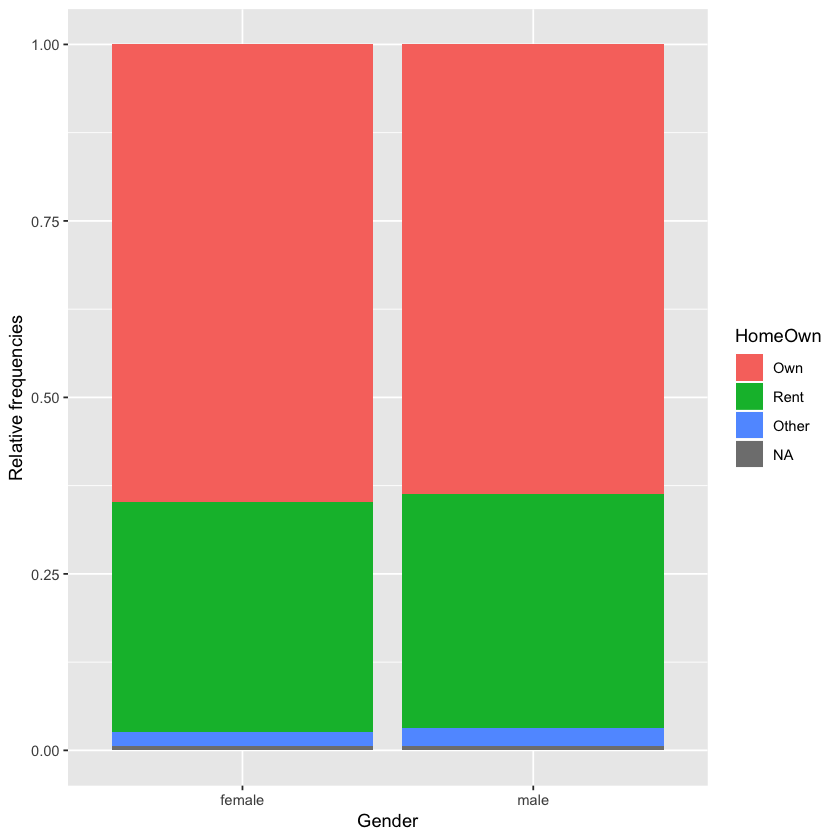

In [73]:
ggplot(NHANES, aes(x = Gender, fill = HomeOwn)) + 
  geom_bar(position = "fill") +
  ylab("Relative frequencies")

Warning message:
“Removed 2245 rows containing non-finite values (stat_density).”

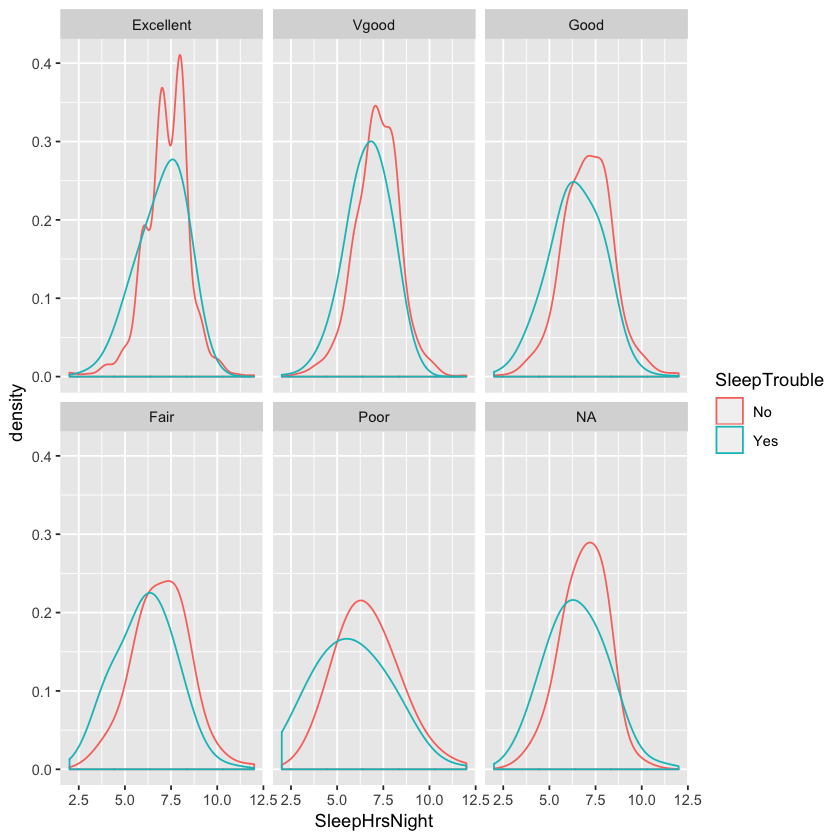

In [74]:
ggplot(NHANES , aes(x = SleepHrsNight, color = SleepTrouble)) + 
  geom_density(adjust = 2) + 
  facet_wrap(~ HealthGen)

In [75]:
library(dplyr)
install.packages("infer")
library(infer)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [76]:
# Subset the data: homes
homes <- NHANES %>%
  # Select Gender and HomeOwn
  select(Gender, HomeOwn) %>%
  # Filter for HomeOwn equal to "Own" or "Rent"
  filter(HomeOwn %in% c("Own", "Rent"))

In [77]:
diff_orig <- homes %>%   
  # Group by gender
  group_by(Gender) %>%
  # Summarize proportion of homeowners/genders
  summarize(prop_own = mean(HomeOwn == "Own")) %>%
  summarize(obs_diff_prop = diff(prop_own))

diff_orig


obs_diff_prop
-0.007828723


In [78]:
#10 permutations
homeown_perm <- homes %>%
  specify(HomeOwn ~ Gender, success = "Own") %>%
  hypothesize(null = "independence") %>% 
  generate(reps = 10, type = "permute") 

homeown_perm


HomeOwn,Gender,replicate
Rent,male,1
Own,male,1
Own,male,1
Own,male,1
Own,female,1
Own,male,1
Own,male,1
Own,female,1
Own,female,1
Rent,female,1


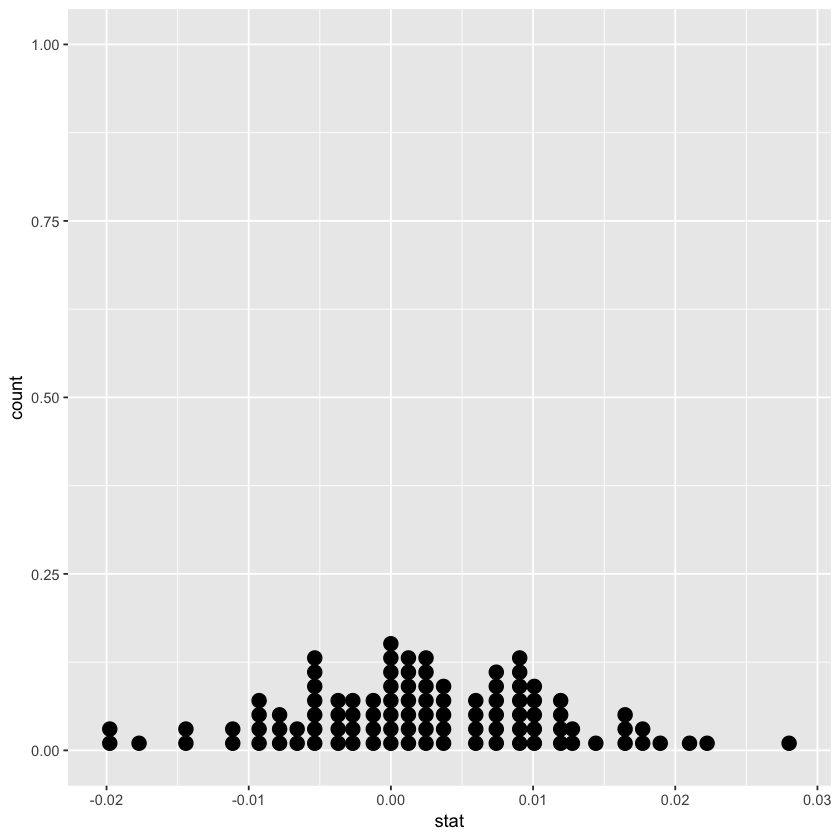

In [79]:
#plotting 100 permutations
homeown_perm <- homes %>%
  specify(HomeOwn ~ Gender, success = "Own") %>%
  hypothesize(null = "independence") %>% 
  generate(reps = 100, type = "permute") %>% 
  calculate(stat = "diff in props", order = c("male", "female"))
  
ggplot(homeown_perm, aes(x = stat)) + 
  geom_dotplot(binwidth = 0.001)



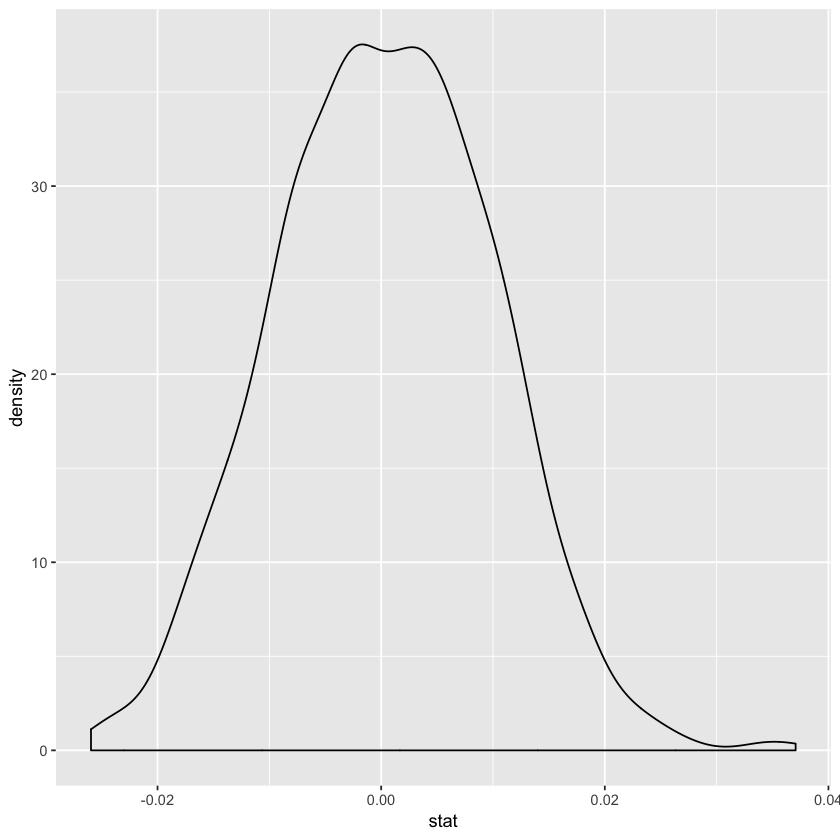

In [82]:
homeown_perm <- homes %>%
 specify(HomeOwn ~ Gender, success = "Own") %>%
hypothesize(null = 'independence') %>% 
  generate(reps = 1000, type = "permute") %>% 
  calculate(stat = "diff in props", order = c("male", "female"))

# Density plot of 1000 permuted differences in proportions
ggplot(homeown_perm, aes(x = stat)) + 
  geom_density()
